# Artificial Neural Network (ANN): The "Hello World"

We are going to build a **Deep Neural Network** to classify handwritten digits (0-9).

### Architecture
- **Input Layer:** 64 Neurons (8x8 pixels flattened).
- **Hidden Layer 1:** 128 Neurons (Relu activation). extracts shapes (lines, curves).
- **Hidden Layer 2:** 64 Neurons (Relu activation). Combines shapes into digits.
- **Output Layer:** 10 Neurons (Softmax probabilities). One for each digit.

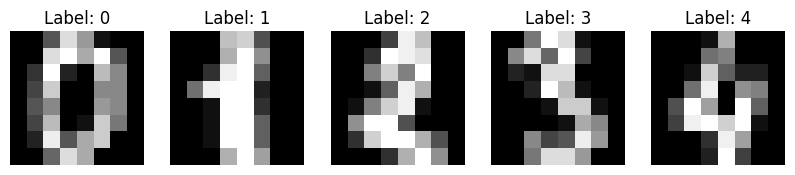

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load Data
digits = load_digits()
X = digits.data
y = digits.target

# Visualize a few
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()

## 2. Preprocessing
Neural Networks represent "Feature Importance" by weights ($w$). 
If features have different scales, the weights gets messed up. **Always Scale Data for NNs.**

In [2]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale (StandardScaler helps convergence)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Building the Brain
- `hidden_layer_sizes=(128, 64)`: Two hidden layers.
- `activation='relu'`: Rectified Linear Unit. The standard for Deep Learning (prevents vanishing gradients).
- `solver='adam'`: Adaptive Moment Estimation. The best general-purpose optimizer.
- `alpha=0.0001`: L2 Regularization (prevents overfitting).

In [3]:
ann = MLPClassifier(hidden_layer_sizes=(128, 64), 
                    activation='relu', 
                    solver='adam', 
                    alpha=1e-4,
                    max_iter=500, # Epochs
                    random_state=42)

ann.fit(X_train_scaled, y_train)

print(f"Training Accuracy: {ann.score(X_train_scaled, y_train):.4f}")

Training Accuracy: 1.0000


## 4. Evaluation
Let's check the Test set.

Test Accuracy: 0.9722


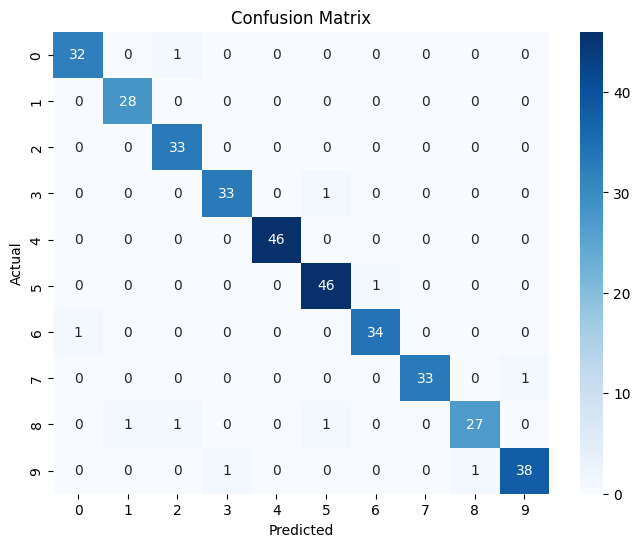

In [4]:
y_pred = ann.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Analyzing Mistakes
Let's see the images where the model got confused.

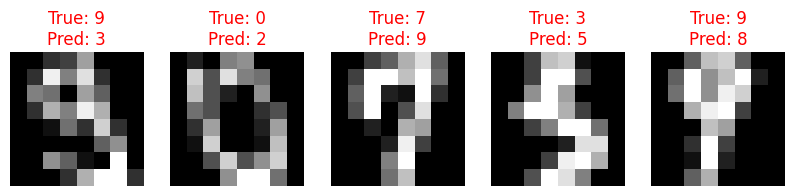

In [5]:
# Find indices of errors
errors = (y_pred != y_test)
X_errors = X_test[errors]
y_errors = y_test[errors]
pred_errors = y_pred[errors]

# Plot first 5 errors
if len(X_errors) > 0:
    fig, axes = plt.subplots(1, min(5, len(X_errors)), figsize=(10, 3))
    for i, ax in enumerate(axes):
        ax.imshow(X_errors[i].reshape(8, 8), cmap='gray')
        ax.set_title(f"True: {y_errors[i]}\nPred: {pred_errors[i]}", color='red')
        ax.axis('off')
    plt.show()
else:
    print("Wow! 100% Accuracy. No mistakes to show.")